# Regressão Linear


A regressão linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente 𝑌 e uma ou mais variáveis independentes X. O objetivo é encontrar a melhor linha reta (ou hiperplano, no caso de múltiplas variáveis independentes) que descreve essa relação.A regressão linear é amplamente utilizada em várias áreas, como economia, finanças, ciências sociais, biologia e engenharia, para prever valores, entender relações entre variáveis e tomar decisões baseadas em dados quantitativos.


**Definição do Problema:** Prever as notas dos alunos com base em diversas métricas.

- Variável target: G3 (Trata-se da nota final do aluno no último estágio)

>**Fonte de Dados e dicionário:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

>**Referências:** Formação Cientista de Dados (https://www.datascienceacademy.com.br/)

In [1]:
# Configurações de saídas
options(scipen = 999, digits = 2, repos = 'http://cran.rstudio.com/', repr.plot.width = 20, repr.plot.height = 10)

In [ ]:
# Instalando os pacotes necessários
if(!require(pacman)) install.packages('pacman')
library('pacman')
pacman::p_load(dplyr, ggplot2, ggthemes, corrplot, caret)

In [3]:
# Importando o conjunto de dados
df <- read.csv('/content/estudantes.csv', sep = ';')

In [4]:
# Visualizando as primeiras linhas
head(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [5]:
# Visualizando os tipos de dados
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "yes" "yes" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $

In [6]:
# Transformando as variáveis
variaveis_categoricas <- c('school','sex','address','famsize','Pstatus','Mjob',
                            'Fjob','reason','guardian','schoolsup','famsup',
                            'paid','activities','nursery','higher','internet','romantic')
df[variaveis_categoricas] <- lapply(df[variaveis_categoricas], factor)
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [7]:
# Verificando o sumário das variáveis
summary(df)

 school   sex          age       address famsize   Pstatus      Medu    
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.0  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.0  
                  Median :17.0                             Median :3.0  
                  Mean   :16.7                             Mean   :2.7  
                  3rd Qu.:18.0                             3rd Qu.:4.0  
                  Max.   :22.0                             Max.   :4.0  
      Fedu           Mjob           Fjob            reason      guardian  
 Min.   :0.0   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.0   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.0   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.5   services:103   services:111   reputation:105               
 3rd Qu.:3.0   teacher : 58   teacher : 29                                
 Max.   :4.0                           

In [8]:
# Verificando valores ausentes
sum(is.na(df))

[1] 0

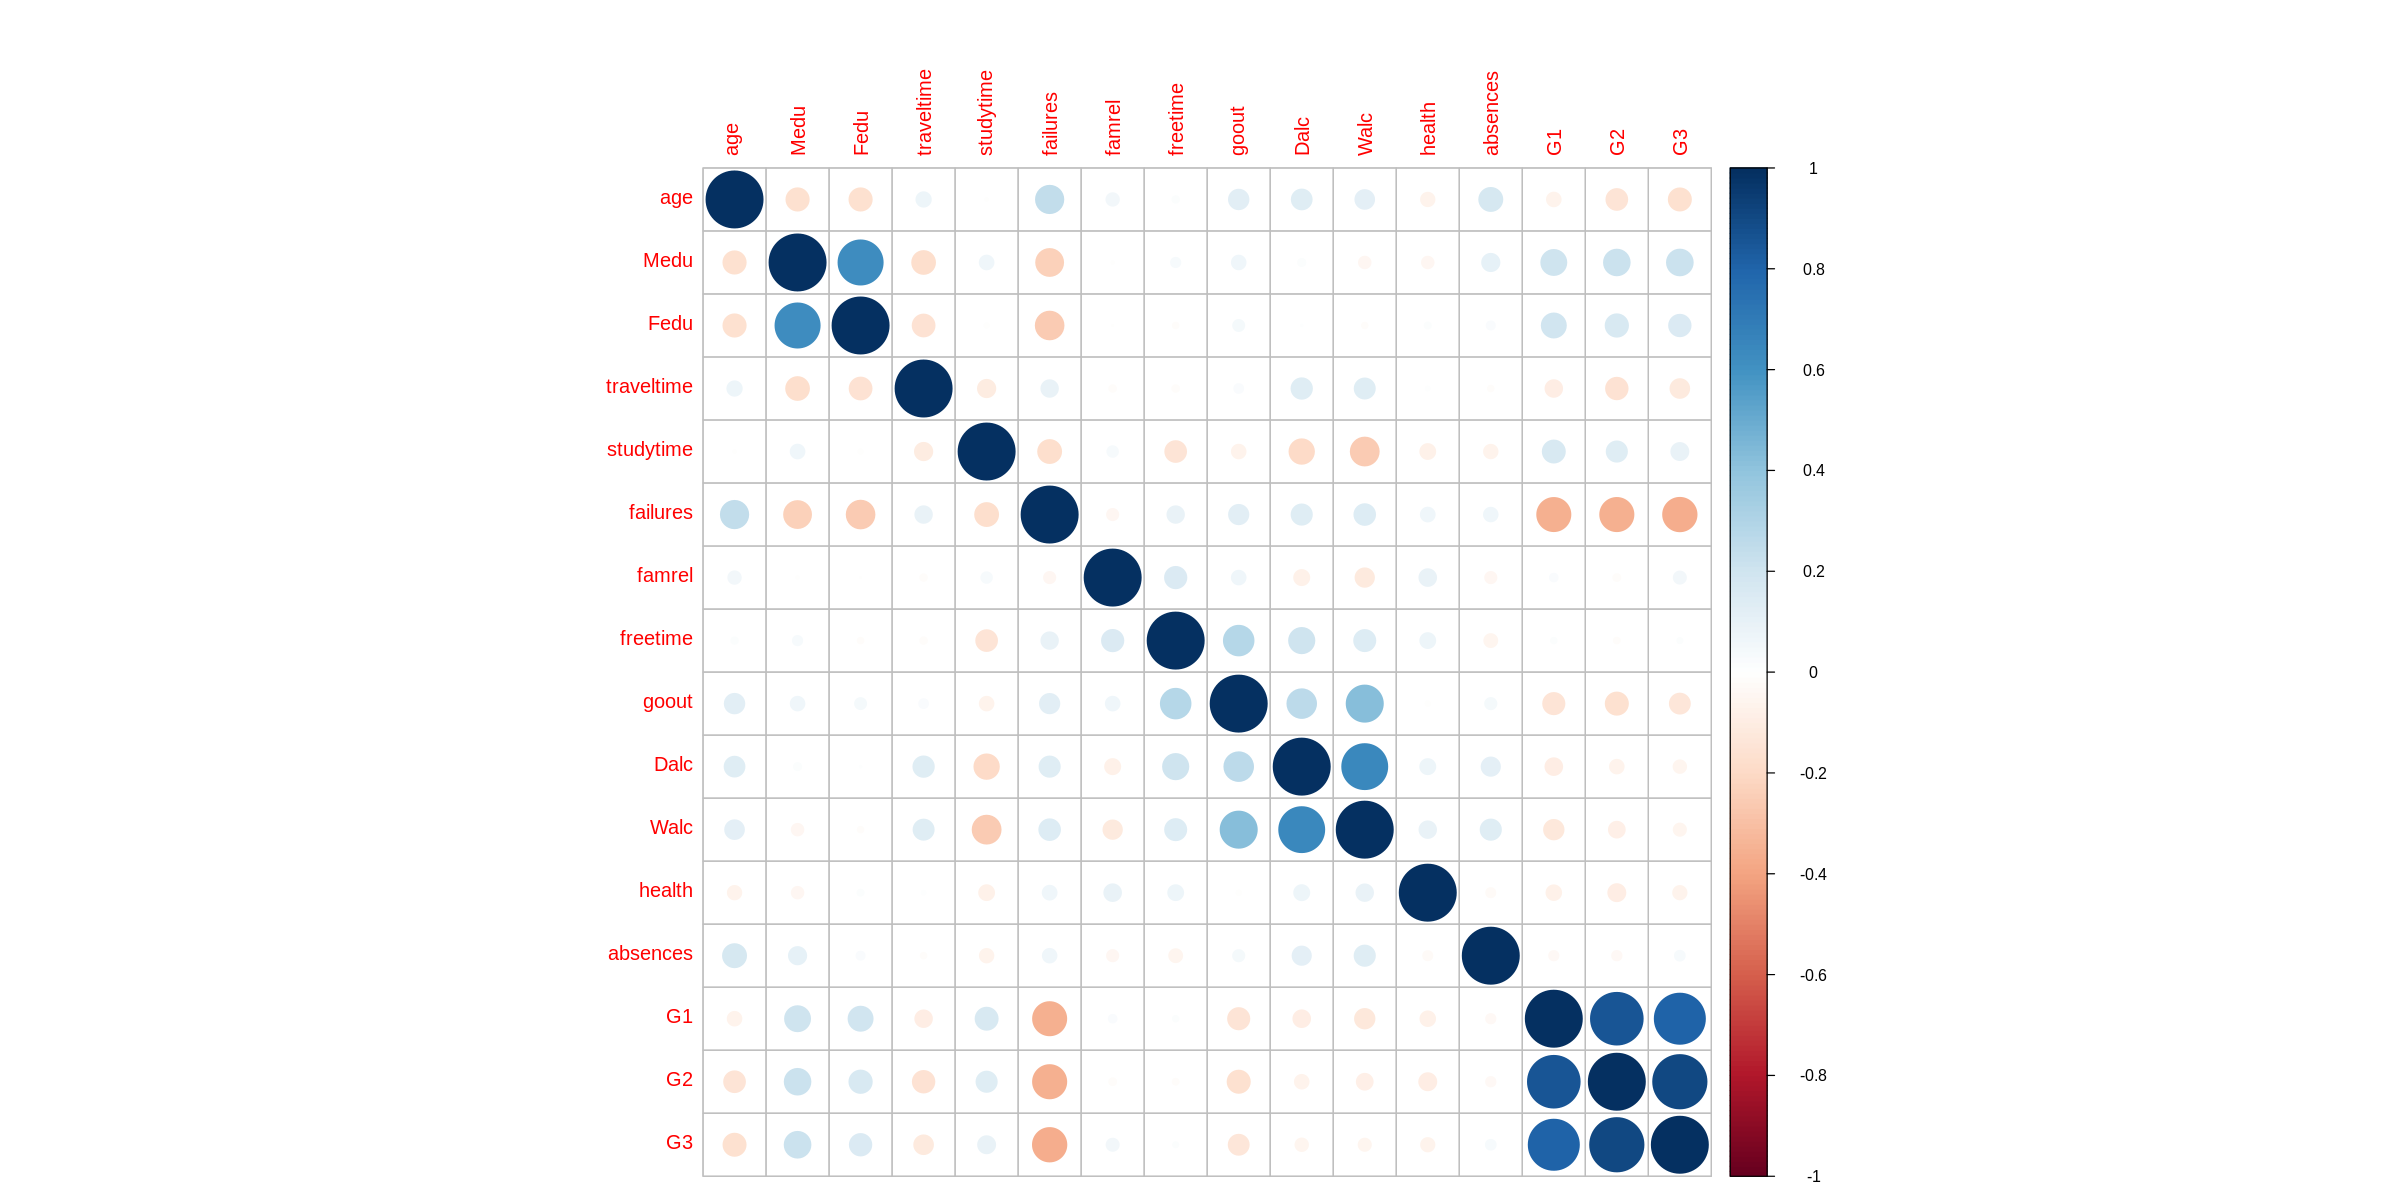

In [9]:
# Analisando as colunas numéricas e correlações
variaveis_numericas <- sapply(df, is.numeric)

# Analisando as correlações entre as variáveis
cor_var_numericas <- cor(df[,variaveis_numericas])
corrplot(cor_var_numericas, method = 'circle')

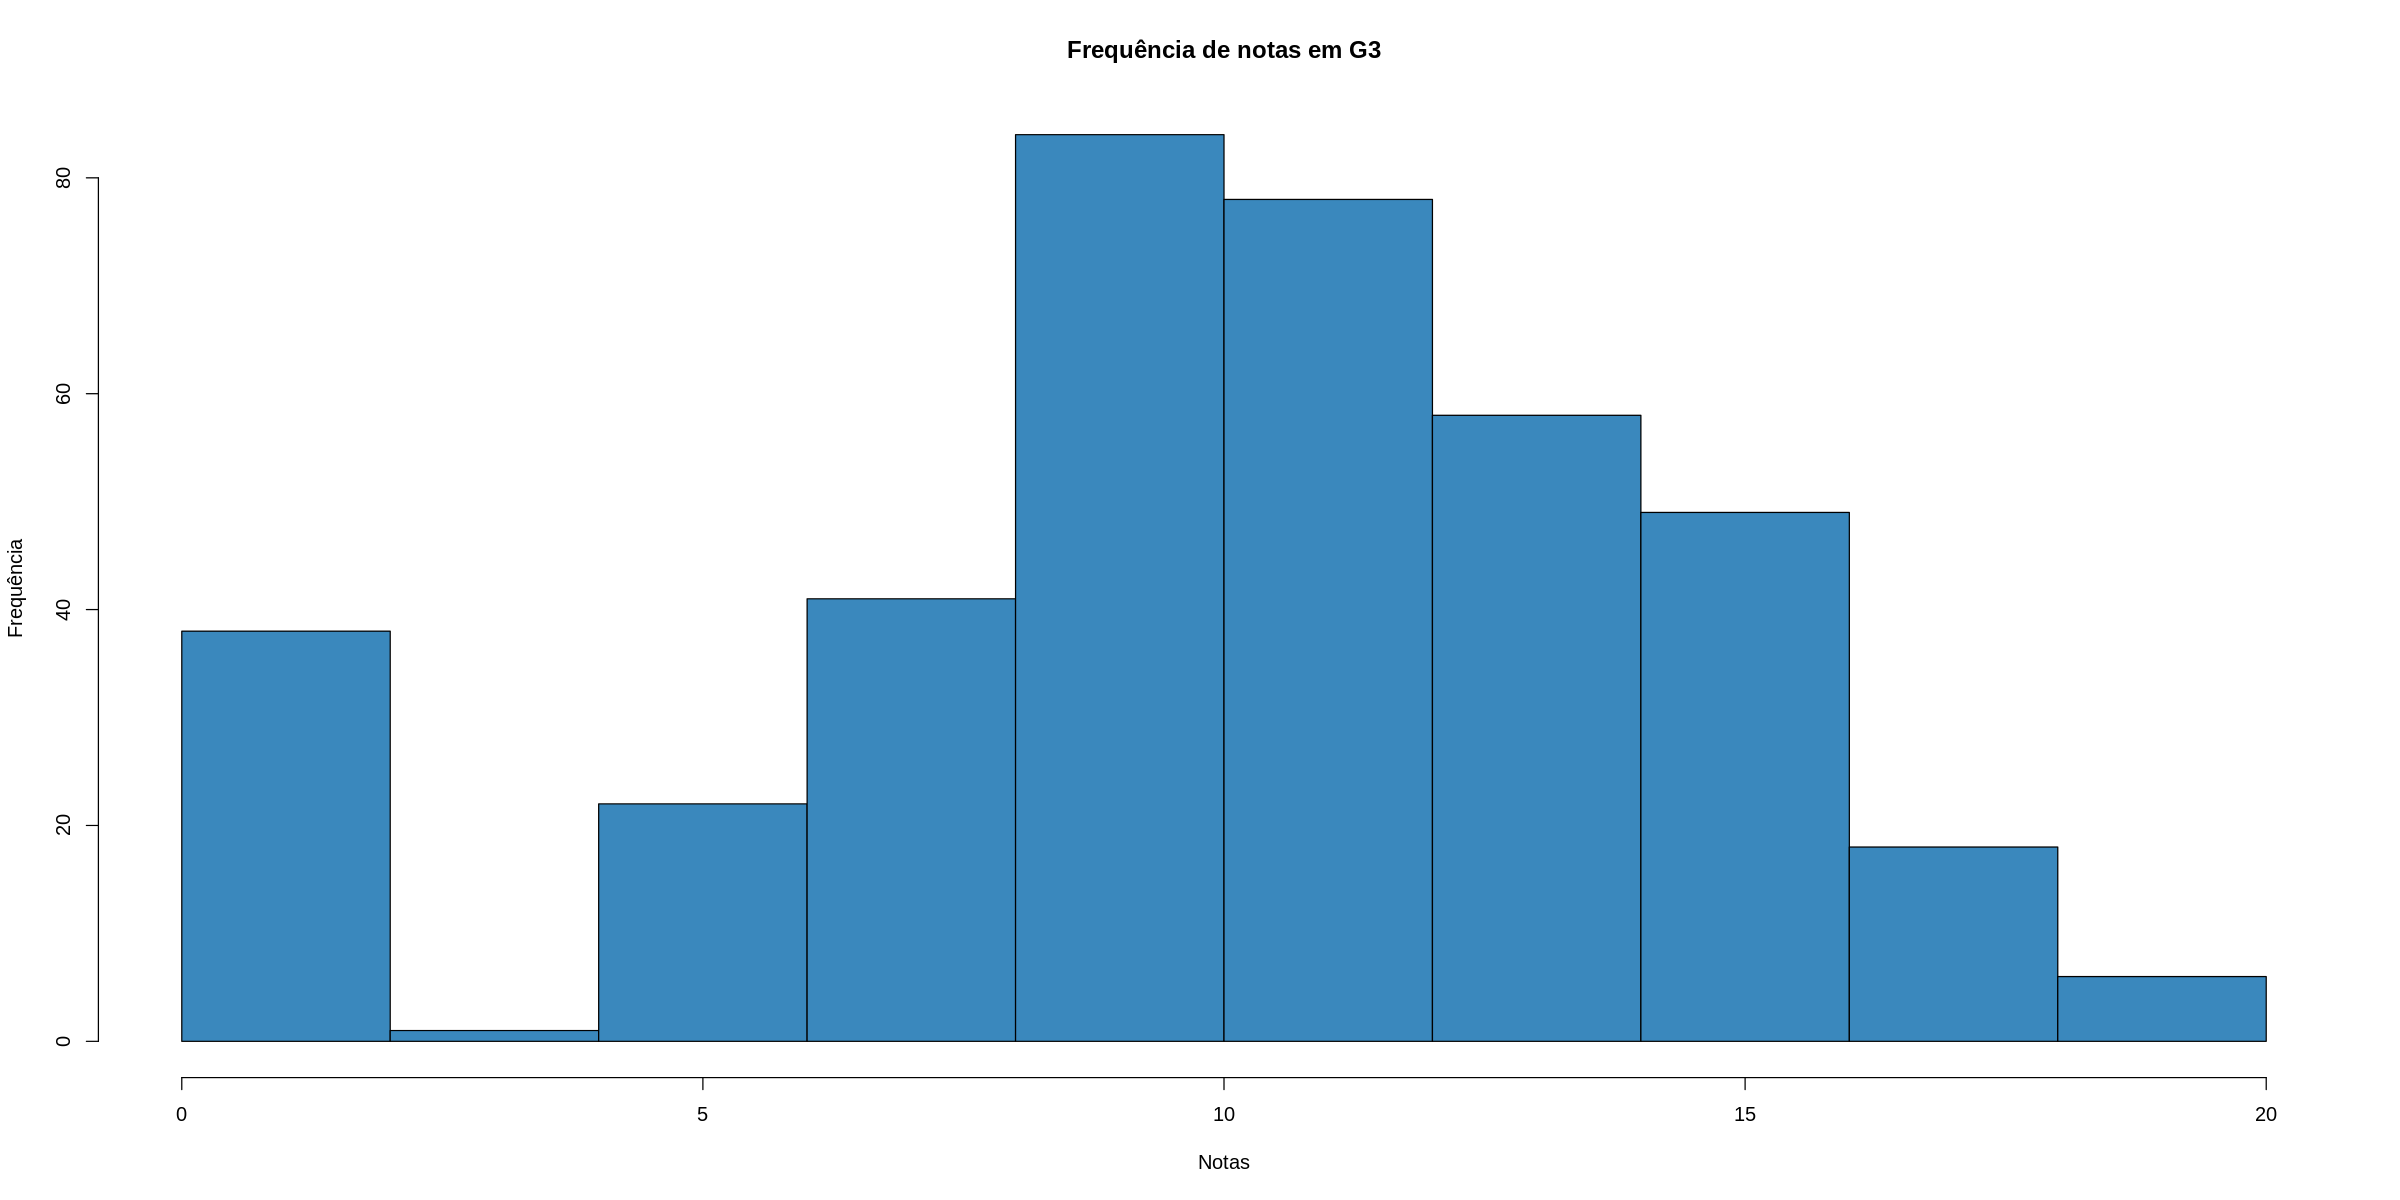

In [10]:
# Verificando a frequências das notas de G3
hist(df$G3,
      main = 'Frequência de notas em G3',
      xlab = 'Notas',
      ylab = 'Frequência',
      col = '#3a88bd')

In [11]:
# Criando a divisão do conjunto de dados (70% treino e 30% teste)
indice <- caret::createDataPartition(df$age, p = 0.7, list = FALSE)
treino <- df[indice,]
teste <- df[-indice,]

In [12]:
# Verificando as dimensões
dim(treino)
dim(teste)

[1] 279  33

[1] 116  33

In [13]:
# Criando os modelos de Regressão Linear

modelo_v1 <- train(G3 ~ ., data = treino, method = 'lm')
modelo_v2 <- train(G3 ~ school + famrel + absences + G1 + G2, data = treino, method = 'lm')
modelo_v3 <- train(G3 ~ G1 + G2, data = treino, method = 'lm')
modelo_v4 <- train(G3 ~ famrel + absences + G2, data = treino, method = 'lm')
modelo_v5 <- train(G3 ~ famrel + absences + G1 + G2, data = treino, method = 'lm')

In [14]:
summary(modelo_v1)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-8.096 -0.575  0.269  1.020  4.025 

Coefficients:
                 Estimate Std. Error t value            Pr(>|t|)    
(Intercept)       0.22643    2.57182    0.09               0.930    
schoolMS          0.32709    0.43305    0.76               0.451    
sexM              0.09910    0.28976    0.34               0.733    
age              -0.25480    0.11991   -2.12               0.035 *  
addressU         -0.17734    0.32831   -0.54               0.590    
famsizeLE3        0.36856    0.28529    1.29               0.198    
PstatusT         -0.04602    0.42482   -0.11               0.914    
Medu              0.15091    0.18746    0.81               0.422    
Fedu             -0.04353    0.15480   -0.28               0.779    
Mjobhealth       -0.51446    0.62541   -0.82               0.412    
Mjobother         0.02743    0.40845    0.07               0.947    
Mjobservices     -0.13052  

In [15]:
summary(modelo_v2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-9.435 -0.362  0.207  0.910  3.519 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  -3.2534     0.6712   -4.85            0.0000021 ***
schoolMS     -0.0384     0.3402   -0.11                0.910    
famrel        0.3244     0.1302    2.49                0.013 *  
absences      0.0331     0.0139    2.38                0.018 *  
G1            0.1494     0.0642    2.33                0.021 *  
G2            0.9897     0.0564   17.56 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9 on 273 degrees of freedom
Multiple R-squared:  0.834,	Adjusted R-squared:  0.831 
F-statistic:  275 on 5 and 273 DF,  p-value: <0.0000000000000002


In [16]:
summary(modelo_v3)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-9.610 -0.349  0.253  0.890  3.662 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  -1.7508     0.3967   -4.41             0.000015 ***
G1            0.1532     0.0652    2.35                 0.02 *  
G2            0.9830     0.0570   17.23 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9 on 276 degrees of freedom
Multiple R-squared:  0.827,	Adjusted R-squared:  0.826 
F-statistic:  660 on 2 and 276 DF,  p-value: <0.0000000000000002


In [17]:
summary(modelo_v4)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-9.492 -0.378  0.248  0.981  3.374 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  -2.8616     0.6426   -4.45             0.000012 ***
famrel        0.3359     0.1308    2.57                0.011 *  
absences      0.0329     0.0139    2.36                0.019 *  
G2            1.1010     0.0300   36.70 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9 on 275 degrees of freedom
Multiple R-squared:  0.831,	Adjusted R-squared:  0.829 
F-statistic:  450 on 3 and 275 DF,  p-value: <0.0000000000000002


In [18]:
summary(modelo_v5)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-9.429 -0.358  0.192  0.921  3.525 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  -3.2660     0.6607   -4.94            0.0000013 ***
famrel        0.3250     0.1299    2.50                0.013 *  
absences      0.0333     0.0138    2.41                0.017 *  
G1            0.1493     0.0641    2.33                0.021 *  
G2            0.9902     0.0561   17.64 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9 on 274 degrees of freedom
Multiple R-squared:  0.834,	Adjusted R-squared:  0.832 
F-statistic:  344 on 4 and 274 DF,  p-value: <0.0000000000000002


modelo_v1 apresentou melhor R-squared de 0.847

In [19]:
# Calculando os resíduos
res <- residuals(modelo_v1)
res <- as.data.frame(res)
head(res)

,res
,<dbl>
X3,1.574
X4,1.724
X8,1.755
X9,-0.040
X11,1.077
X12,0.067


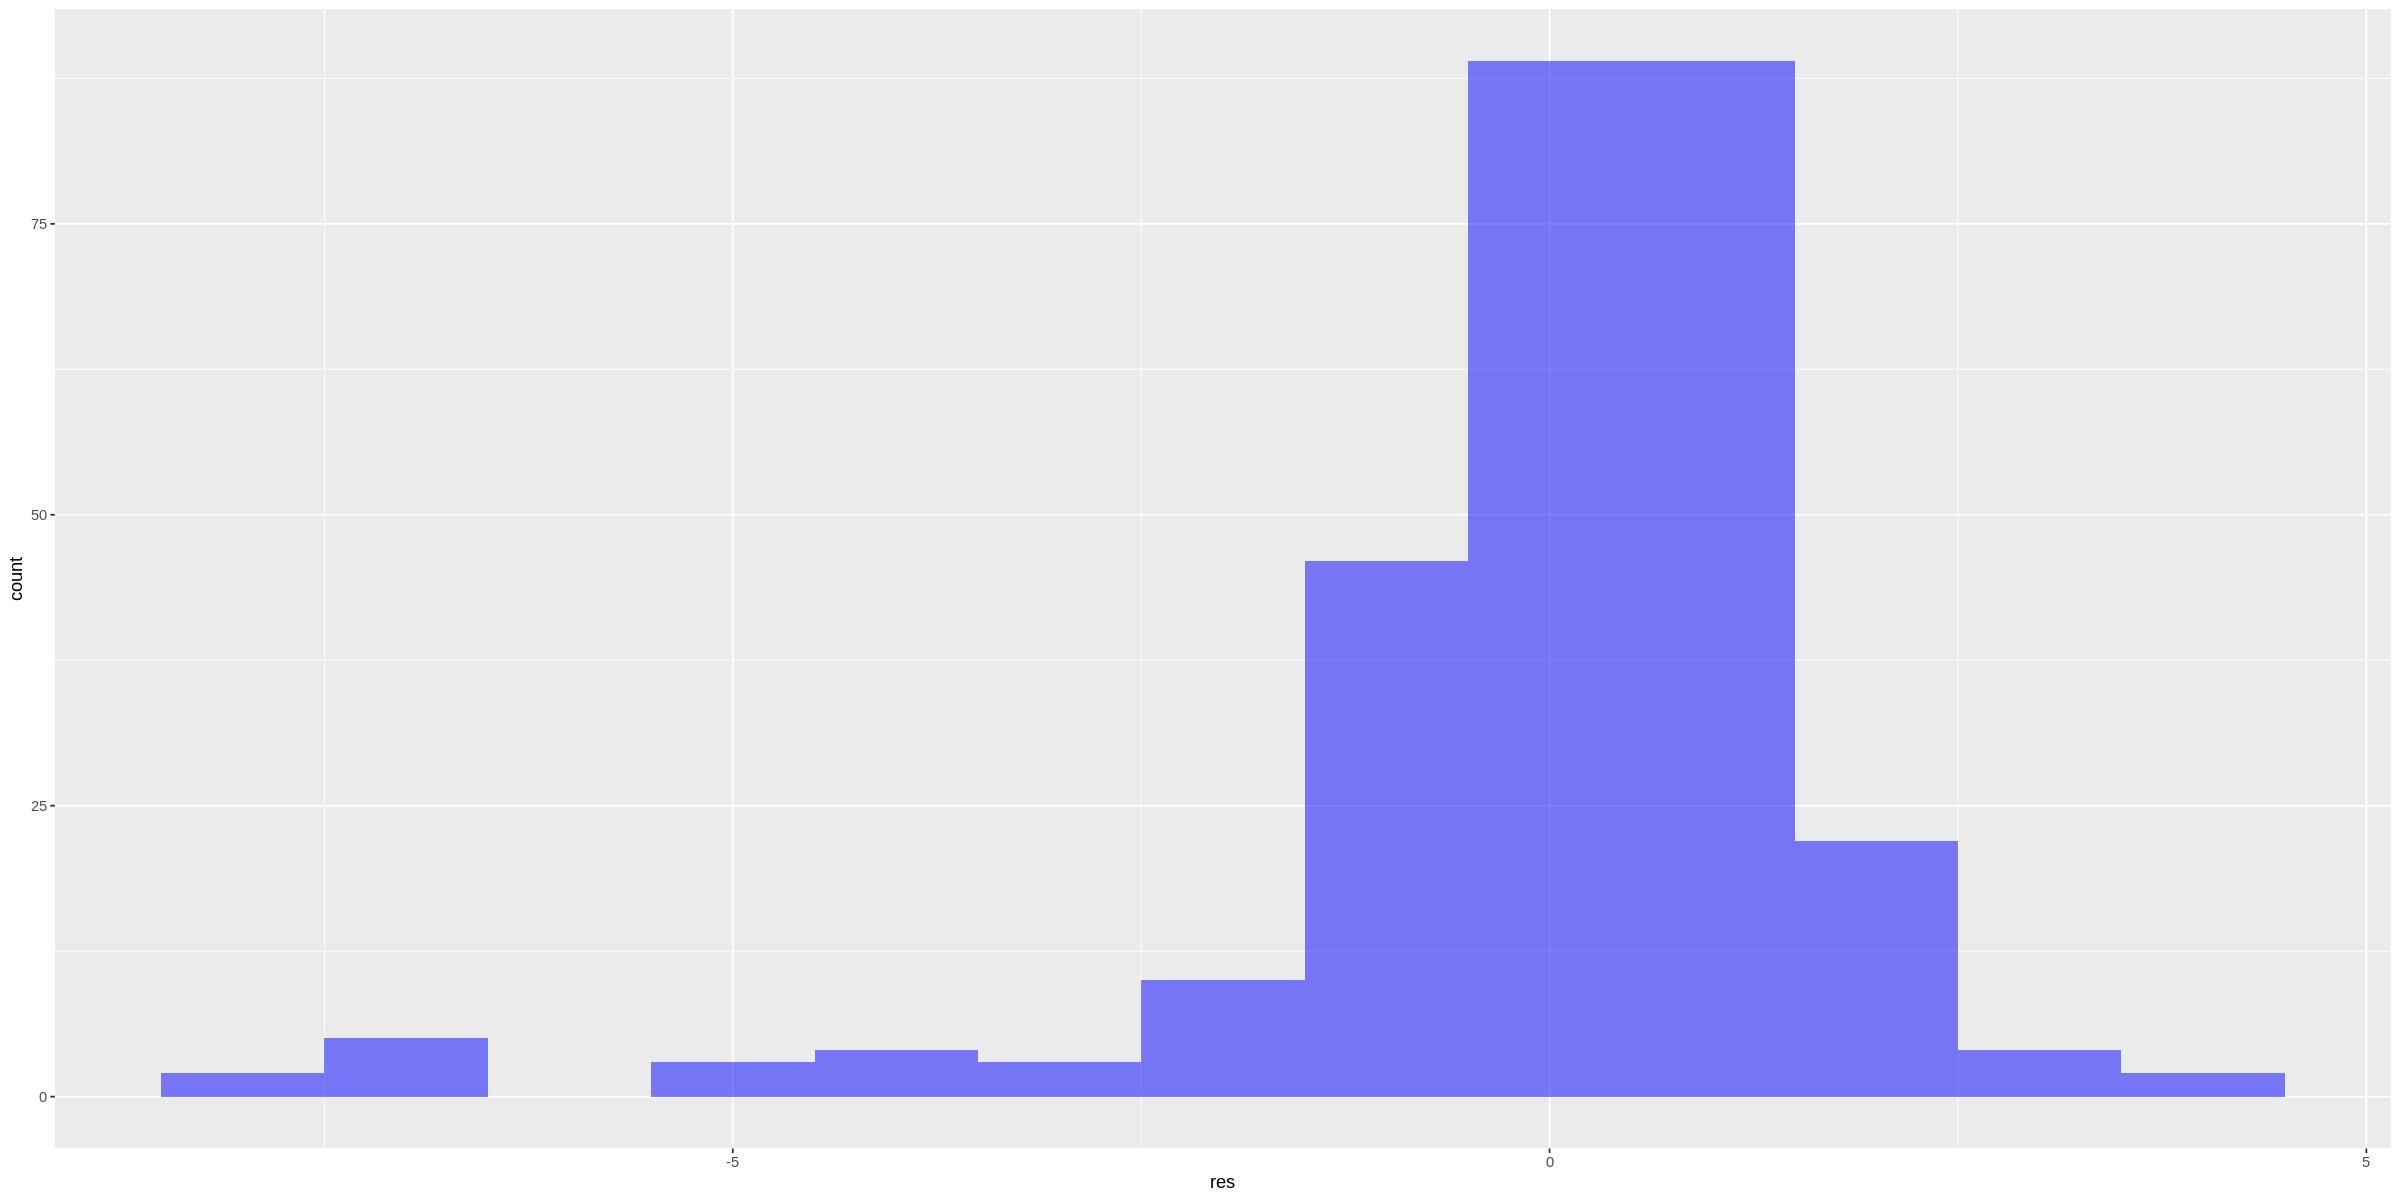

In [20]:
# Verificando em gráfico
ggplot(res, aes(res)) +
  geom_histogram(fill = 'blue', alpha = 0.5, binwidth = 1)

In [21]:
# Prevendo com os dados de teste
previsoes <- predict(modelo_v1, teste)

# Organizando os dados
resultados <- cbind(previsoes, teste$G3)
colnames(resultados) <- c('Previsto','Real')
resultados <- as.data.frame(resultados)
head(resultados)

,Previsto,Real
,<dbl>,<dbl>
1,4.8,6
2,4.1,6
5,9.3,10
6,16.7,15
7,12.4,11
10,15.9,15


In [22]:
# Verificando os valores
min(resultados)

# Tratando os valores abaixo de zero
resultados$Previsto <- sapply(resultados$Previsto, function(x){ifelse(x<0,0,x)})
head(resultados[resultados$Previsto == 0,])

[1] -2.1

,Previsto,Real
,<dbl>,<dbl>
145,0,0
154,0,0
333,0,0


In [23]:
# Calculando o erro médio
# O quão distante os valores previstos estão dos reais
MSE <- mean((resultados$Real - resultados$Previsto)^2)

RMSE <- MSE^0.5

# Calculando o R-Squared
# Avalia o nível de precisão do modelo
SSE <- sum((resultados$Previsto - resultados$Real)^2)
SST <- sum((mean(df$G3) - resultados$Real)^2)
R2 <- 1 - (SSE/SST)
R2

[1] 0.82